In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Ishan-world\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to add a channel dimension (needed for CNNs)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))


Epoch 1/5


1875/1875 [==============================] - 284s 145ms/step - loss: 0.1448 - accuracy: 0.9553 - val_loss: 0.0569 - val_accuracy: 0.9829
Epoch 2/5
1875/1875 [==============================] - 282s 151ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 3/5
1875/1875 [==============================] - 283s 151ms/step - loss: 0.0312 - accuracy: 0.9903 - val_loss: 0.0544 - val_accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 267s 142ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0264 - val_accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 269s 144ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0323 - val_accuracy: 0.9912


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')


313/313 [==============================] - 19s 61ms/step - loss: 0.0323 - accuracy: 0.9912
Test accuracy: 0.9912


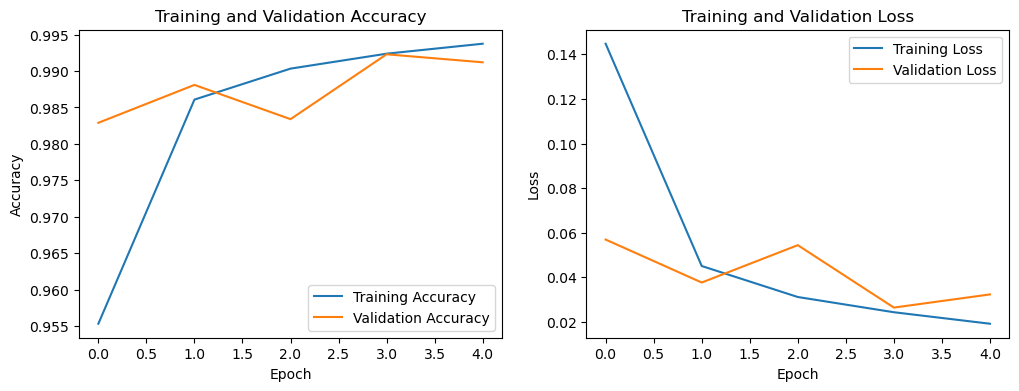

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
predictions = model.predict(test_images)

# Example: Predict the first test image
print(np.argmax(predictions[3]))  # Predicted label
plt.imshow(test_images[3].reshape(28, 28), cmap=plt.cm.binary)
plt.show()


 11/313 [>.............................] - ETA: 19s

313/313 [==============================] - 20s 64ms/step


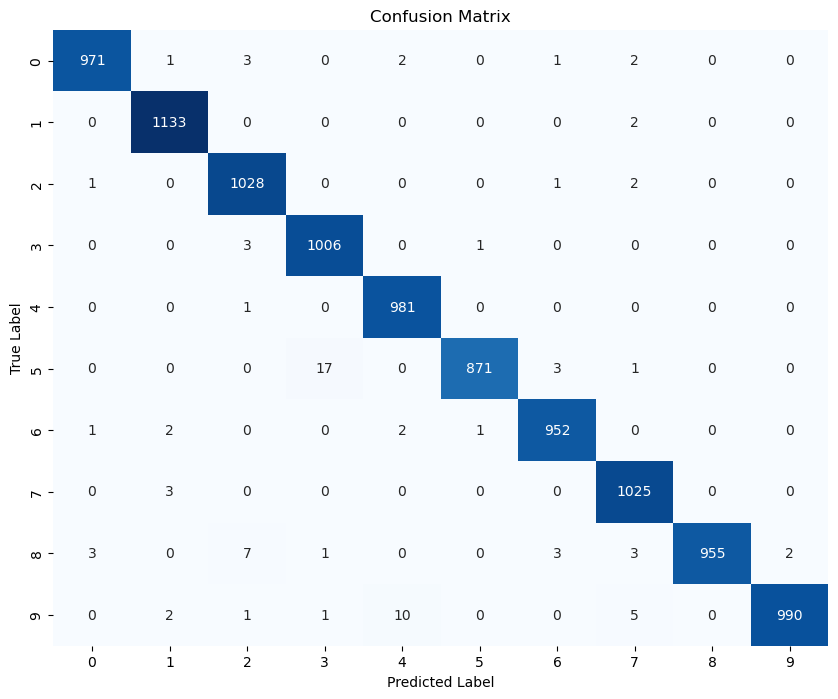

In [10]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set
predictions = model.predict(test_images)
y_pred_classes = np.argmax(predictions, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [11]:
pip install opencv-python

In [12]:
import cv2
print(cv2.__version__)


4.10.0


In [13]:
model.save('mnist_cnn_model.h5')


C:\Users\Ishan-world\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
